In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as KMeans

In [116]:
CD = pd.read_csv("Mall_Customers.csv")

In [117]:
CD.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [118]:
CD.shape

(200, 5)

In [119]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [120]:
CD.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [121]:
#Annual income
#spending score
#CD = CD[['Annual Income (k$)','Spending Score (1-100)']]

In [122]:
CD =  CD.iloc[:,[3,4]].values

In [123]:
CD

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [124]:
from sklearn.cluster import KMeans

In [125]:
#Finding WCSS value for different number of clusters 

WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(CD)
    WCSS.append(kmeans.inertia_)


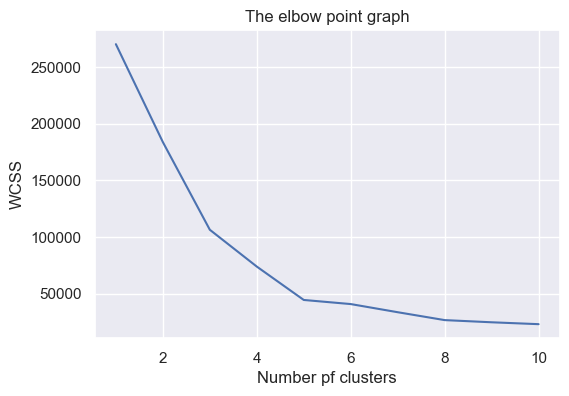

In [126]:
sns.set()
plt.figure(figsize=(6,4))
plt.plot(range(1,11), WCSS)
plt.title("The elbow point graph")
plt.xlabel("Number pf clusters")
plt.ylabel("WCSS")
plt.show()

In [131]:
Kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=1)

In [132]:
x = Kmeans.fit_predict(CD)

In [133]:
print(x)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


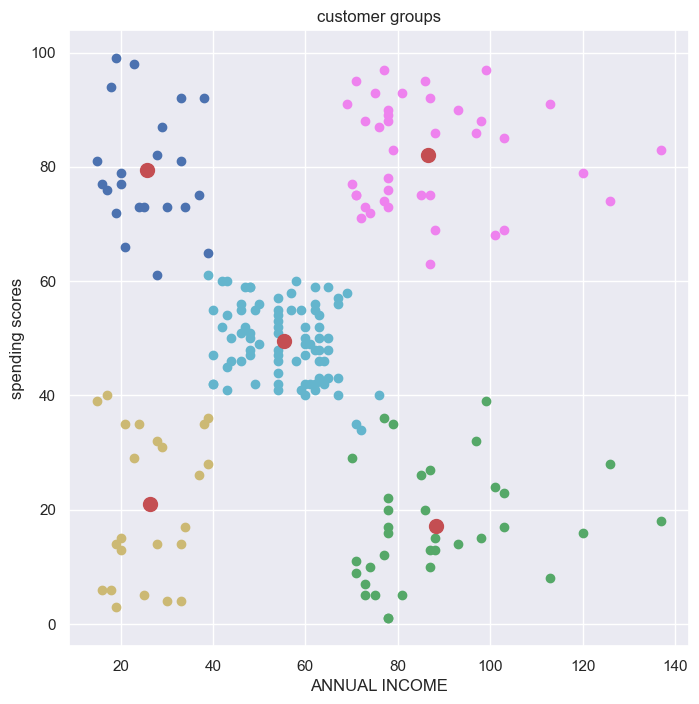

In [135]:
plt.figure(figsize=(8,8))
plt.scatter(CD[x==0,0], CD[x==0,1], c='c', label='cluster 0')
plt.scatter(CD[x==1,0], CD[x==1,1], c='g', label='cluster 1')
plt.scatter(CD[x==2,0], CD[x==2,1], c='b', label='cluster 2')
plt.scatter(CD[x==3,0], CD[x==3,1], c='violet', label='cluster 3')
plt.scatter(CD[x==4,0], CD[x==4,1], c='y', label='cluster 4')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1], s =100, c='r', label='centroid')
plt.title("customer groups")
plt.xlabel('ANNUAL INCOME')
plt.ylabel('spending scores')
plt.show()